In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict


from sklearn import svm
from imblearn.over_sampling import SMOTE, ADASYN




In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])



In [3]:
def comp(X, lower, upper):
    outliers = []
    for i in range(X.shape[0]):
        if np.sum(X[i] < lower) + np.sum(X[i] > upper) > 0:
            outliers.append(i)
    return outliers
 
def check_outliers(X):
    q25 = X.quantile(0.25, axis=0)
    q75 = X.quantile(0.75, axis=0)
    iqr = q75 - q25
    cut_off = iqr * 1.75
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = comp(X.values, lower, upper)
    return outliers

In [4]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_1_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_1_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_1_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
for i in range(X_train_load.shape[1]):
    print(anderson(X_train_load[np.where(y_train_load==1)][:,i])[0], anderson(X_train_load[np.where(y_train_load==0)][:,i])[0])
    

0.271992817459 0.243600027825
0.349375763352 0.307856368226
0.268804649749 0.367901665525
0.551565284509 0.252581102913
0.2481967128 0.218092216998
0.324205189527 0.872590526477
0.668727201313 0.350535915325
0.152916801139 0.316332767243
0.564091820811 0.37549298996
0.43216835647 0.460214000617
0.401075638227 0.304762871428
0.254672503326 0.416178806487
0.563845031894 0.359317551619
0.332923888775 0.807514396113
0.320453813891 0.218473333042
0.436333436211 0.37669930648
0.278007682777 0.451730711119
0.26725793188 0.165487188861
0.402207983818 0.267669589237
0.143025234374 0.536292142515


In [7]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)

(1000, 20)
(1000,)
(1000, 20)


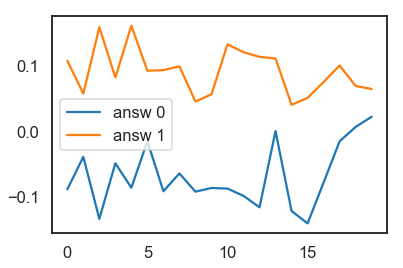

In [8]:
plt.plot(np.mean(X_train_load[np.where(y_train_load==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train_load[np.where(y_train_load==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')

plt.savefig('Practise_1_FeatureMean.pdf')

In [9]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function mutual_info_classif at 0x1143b8b70>)

In [10]:
np.sort(skb.scores_)[::-1][:40]

array([ 0.03064903,  0.02968684,  0.02289012,  0.02193187,  0.02026202,
        0.01815322,  0.00982371,  0.00870048,  0.00541454,  0.00196092,
        0.00114647,  0.00103485,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [11]:
skb.k = 20

In [12]:
X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
# X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)




In [13]:
# Deleted_parameters = check_outliers(pd.DataFrame(X_train))
# X_train = np.delete(X_train, Deleted_parameters, axis = 0)
# y_train = np.delete(y_train, Deleted_parameters, axis = 0)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 20)
(1000,)
(1000, 20)


In [15]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-5180 -1000
482


In [16]:
print(np.mean(np.sum(X_train[np.where(y_train==1)], axis = 1)))
print(np.mean(np.sum(X_train[np.where(y_train==0)], axis = 1)))

1.77019883259
-1.42794687046


In [17]:
# print(np.mean(np.sign(X_train[np.where(y_train==1)]), axis = 0))
# print(np.mean(np.sign(X_train[np.where(y_train==0)]), axis = 0))

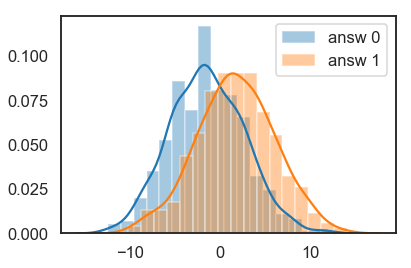

In [18]:
sns.distplot(np.sum(X_train[np.where(y_train==0)], axis = 1), label = 'answ 0')
sns.distplot(np.sum(X_train[np.where(y_train==1)], axis = 1), label = 'answ 1')

plt.legend(loc='best')
plt.savefig('Practise_1_Statistic.pdf')

In [19]:
X_train_new = np.reshape(np.sum(X_train, axis = 1), [-1,1])
X_test_new = np.reshape(np.sum(X_test, axis = 1), [-1,1])
y_train_new = np.array(y_train)

In [20]:
# X_train_new = np.hstack([np.reshape(np.sum(np.sign(X_train), axis = 1), [-1,1]), X_train_new])
# X_train_new = np.hstack([np.reshape(np.sum(np.sign(X_test), axis = 1), [-1,1]), X_test_new])


In [21]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)


ACC 0.658
AUC 0.706463576796
NUM 342
ASY1 -1969
ASY2 -165


In [22]:
rho = 0.9
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)



ACC 0.523
AUC 0.706463576796
NUM 477
ASY1 -4665
ASY2 -44


In [23]:
rho = 0.63
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.631
AUC 0.706463576796
NUM 369
ASY1 -3785
ASY2 -208


In [24]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_1_answ.csv', sep = ',')